In [1]:
import pandas as pd
import seaborn as sns

In [2]:
screen_width_pix = 1920
screen_height_pix = 1080

In [3]:
subjects_to_include = "data/subject_files.txt"
resumes_to_include = "data/resume_names.txt"

In [4]:
subjects_data = []  # contains raw eye-tracking data for each subject
times_subjects = []  # list of dataframes. each dataframe contains times spent per block per resume for each subject
times_subjects_norm = []  # list of dataframes. each dataframe contains times spent per block per resume for each subject, normalized
all_resumes = []   # resume names
subject_files = []


In [5]:
with open(subjects_to_include, 'r') as file:
    lines = file.readlines()
    for line in lines:
        subject_files.append(line.strip())
        
print(subject_files)

['data/subjects_tsv/subject-1.tsv', 'data/subjects_tsv/subject-2.tsv', 'data/subjects_tsv/subject-3.tsv', 'data/subjects_tsv/subject-4.tsv', 'data/subjects_tsv/subject-5.tsv', 'data/subjects_tsv/subject-6.tsv', 'data/subjects_tsv/subject-7.tsv', 'data/subjects_tsv/subject-8.tsv', 'data/subjects_tsv/subject-9.tsv', 'data/subjects_tsv/subject-10.tsv', 'data/subjects_tsv/subject-12.tsv']


In [6]:
with open(resumes_to_include, 'r') as file:
    lines = file.readlines()
    for line in lines:
        all_resumes.append(line.strip())
        
print(all_resumes)

['QUALIFIED_NOPIC_ GOODSORT_HANNAH.PNG', 'QUALIFIED_PIC_ GOODSORT_HANNAH.PNG', 'QUALIFIED_PIC_ GOODSORT_AISHA.PNG', 'QUALIFIED_NOPIC_ GOODSORT_AISHA.PNG', 'QUALIFIED_NOPIC_BADSORT_DAVID.PNG', 'QUALIFIED_PIC_BADSORT_DAVID.PNG', 'UNQUALIFIED_PIC_BADSORT_TIAN.PNG', 'UNQUALIFIED_NOPIC_BADSORT_TIAN.PNG', 'QUALIFIED_PIC_BADSORT_VIKTOR.PNG', 'QUALIFIED_NOPIC_BADSORT_VIKTOR.PNG', 'QUALIFIED_PIC_BADSORT_RAHUL.PNG', 'QUALIFIED_NOPIC_BADSORT_RAHUL.PNG', 'QUALIFIED_PIC_GOODSORT_EMILIA.PNG', 'QUALIFIED_NOPIC_GOODSORT_EMILIA.PNG', 'UNQUALIFIED_NOPIC_GOODSORT_LEA.PNG', 'UNQUALIFIED_PIC_GOODSORT_LEA.PNG', 'UNQUALIFIED_NOPIC_ BADSORT_MARIA.PNG', 'UNQUALIFIED_PIC_ BADSORT_MARIA.PNG', 'UNQUALIFIED_PIC_ BADSORT_LEILA.PNG', 'UNQUALIFIED_NOPIC_ BADSORT_LEILA.PNG', 'UNQUALIFIED_NOPIC_GOODSORT_KARE.PNG', 'UNQUALIFIED_PIC_GOODSORT_KARE.PNG', 'UNQUALIFIED_NOPIC_GOODSORT_HANS.PNG', 'UNQUALIFIED_PIC_GOODSORT_HANS.PNG']


In [7]:
def filter_keys(original_dict, allowed_keys):
    filtered_dict = {key: value for key, value in original_dict.items() if key in allowed_keys}
    return filtered_dict

In [8]:
# pixel coordinates for areas of interest for each resume. coordinates correspond to 1920*1080 resolution

aoi_all = {
    "QUALIFIED_PIC_GOODSORT_EMILIA.PNG": {
        "name" : [(605,39), (980,245)],
        "picture" : [(995,39), (1314,245)],
        "experience" : [(605,245), (980,1040)],
        "languages" : [(995,245), (1314,385)],
        "education" : [(995,385), (1314,610)],
        "skills" : [(995,610), (1314,770)],
        "hobbies" : [(995,870), (1314,1040)],
        "soft_skills" : [(995,770), (1314,870)]
    },
    "QUALIFIED_NOPIC_GOODSORT_EMILIA.PNG": {
        "name" : [(605,39), (980,245)],
        "picture" : [(-1,-1), (-1,-1)],
        "experience" : [(605,245), (980,1040)],
        "languages" : [(995,245), (1314,385)],
        "education" : [(995,385), (1314,610)],
        "skills" : [(995,610), (1314,770)],
        "hobbies" : [(995,870), (1314,1040)],
        "soft_skills" : [(995,770), (1314,870)]
    },
    "QUALIFIED_NOPIC_BADSORT_VIKTOR.PNG": {
        "name" : [(605,39), (952,243)],
        "picture" : [(-1,-1), (-1,-1)],
        "experience" : [(937,405), (1314,1040)],
        "languages" : [(605,577), (937,745)],
        "soft_skills" : [(605,265), (937,402)],
        "skills" : [(605,405), (937,575)],
        "education" : [(605,745), (937,1040)],
        "hobbies" : [(937,265), (1314,402)]
    },
    "QUALIFIED_PIC_BADSORT_VIKTOR.PNG": {
        "name" : [(605,39), (952,243)],
        "picture" : [(937,39), (1314,243)],
        "experience" : [(937,405), (1314,1040)],
        "languages" : [(605,577), (937,745)],
        "soft_skills" : [(605,265), (937,402)],
        "skills" : [(605,405), (937,575)],
        "education" : [(605,745), (937,1040)],
        "hobbies" : [(937,265), (1314,402)]
    },
    "UNQUALIFIED_NOPIC_GOODSORT_KARE.PNG": {
        "name" : [(605,39), (944,243)],
        "picture" : [(-1,-1), (-1,-1)],
        "experience" : [(605,255), (944,797)],
        "languages" : [(950,607), (1040,870)],
        "soft_skills" : [(-1,-1), (-1,-1)],
        "skills" : [(950,423), (1040,605)],
        "education" : [(950,255), (1040,420)],
        "hobbies" : [(605,805), (944,980)]
    },
    "UNQUALIFIED_PIC_GOODSORT_KARE.PNG": {
        "name" : [(605,39), (944,243)],
        "picture" : [(950,39), (1040,243)],
        "experience" : [(605,255), (944,797)],
        "languages" : [(950,607), (1040,870)],
        "soft_skills" : [(-1,-1), (-1,-1)],
        "skills" : [(950,423), (1040,605)],
        "education" : [(950,255), (1040,420)],
        "hobbies" : [(605,805), (944,980)]
    },
    "UNQUALIFIED_PIC_GOODSORT_HANS.PNG": {
        "name" : [(605,39), (959,258)],
        "picture" : [(958,39), (1314,258)],
        "experience" : [(605,405),(964,955)],
        "languages" : [(958,257),((1314,404))],
        "soft_skills" : [(958,551),(1314,712)],
        "skills" : [(958,404),(1314,547)],
        "education" : [(605,258),(961,404)],
        "hobbies" : [(958,713),(1314,900)]
    },
    "UNQUALIFIED_NOPIC_GOODSORT_HANS.PNG": {
        "name" : [(605,39), (959,258)],
        "picture" : [(-1,-1), (-1,-1)],
        "experience" : [(605,405),(964,955)],
        "languages" : [(958,257),((1314,404))],
        "soft_skills" : [(958,551),(1314,712)],
        "skills" : [(958,404),(1314,547)],
        "education" : [(605,258),(961,404)],
        "hobbies" : [(958,713),(1314,900)]
    },
    "UNQUALIFIED_NOPIC_ BADSORT_MARIA.PNG": {
        "name" : [(605,39),(954,249)],
        "picture" : [(-1,-1),(-1,-1)],
        "experience" : [(605,254),(954,885)],
        "languages" : [(954,559),(1314,728)],
        "soft_skills" : [(-1,-1),(-1,-1)],
        "skills" : [(954,405),(1314,554)],
        "education" : [(954,249),(1314,401)],
        "hobbies" : [(954,733),(1314,885)]
    },
    "UNQUALIFIED_PIC_ BADSORT_MARIA.PNG": {
        "name" : [(605,39),(954,249)],
        "picture" : [(954,39),(1314,249)],
        "experience" : [(605,254),(954,885)],
        "languages" : [(954,559),(1314,728)],
        "soft_skills" : [(-1,-1),(-1,-1)],
        "skills" : [(954,405),(1314,554)],
        "education" : [(954,249),(1314,401)],
        "hobbies" : [(954,733),(1314,885)]
    },
    "UNQUALIFIED_NOPIC_GOODSORT_LEA.PNG": {
        "name" : [(605,39),(945,250)],
        "picture" : [(-1,-1),(-1,-1)],
        "experience" : [(945,250),(1314,738)],
        "languages" : [(605,734),(945,910)],
        "soft_skills" : [(605,415),(945,570)],
        "skills" : [(605,574),(945,730)],
        "education" : [(945,742),(1314,990)],
        "hobbies" : [(605,255),(945,410)]
    },
    "UNQUALIFIED_PIC_GOODSORT_LEA.PNG": {
        "name" : [(605,39),(945,250)],
        "picture" : [(945,39),(1314,250)],
        "experience" : [(945,250),(1314,738)],
        "languages" : [(605,734),(945,910)],
        "soft_skills" : [(605,415),(945,570)],
        "skills" : [(605,574),(945,730)],
        "education" : [(945,742),(1314,990)],
        "hobbies" : [(605,255),(945,410)]
    },
    "UNQUALIFIED_PIC_BADSORT_TIAN.PNG": {
        "name" : [(605,39),(930,250)],
        "picture" : [(930,39),(1314,248)],
        "experience" : [(930,252),(1314,740)],
        "languages" : [(605,423),(930,650)],
        "soft_skills" : [(605,809),(930,970)],
        "skills" : [(605,654),(930,805)],
        "education" : [(605,43),(930,419)],
        "hobbies" : [(930,744),(1314,890)]
    },
    "UNQUALIFIED_NOPIC_BADSORT_TIAN.PNG": {
        "name" : [(605,39),(930,250)],
        "picture" : [(-1,-1),(-1,-1)],
        "experience" : [(930,252),(1314,740)],
        "languages" : [(605,423),(930,650)],
        "soft_skills" : [(605,809),(930,970)],
        "skills" : [(605,654),(930,805)],
        "education" : [(605,43),(930,419)],
        "hobbies" : [(930,744),(1314,890)]
    },
    "UNQUALIFIED_PIC_ BADSORT_LEILA.PNG": {
        "name" : [(605,39),(934,248)],
        "picture" : [(938,39),(1314,248)],
        "experience" : [(938,412),(1314,984)],
        "languages" : [(938,252),(1314,408)],
        "soft_skills" : [(605,386),(934,634)],
        "skills" : [(605,638),(934,736)],
        "education" : [(605,740),(934,945)],
        "hobbies" : [(605,252),(934,382)]
    },
    "UNQUALIFIED_NOPIC_ BADSORT_LEILA.PNG": {
        "name" : [(605,39),(934,248)],
        "picture" : [(-1,-1),(-1,-1)],
        "experience" : [(938,412),(1314,984)],
        "languages" : [(938,252),(1314,408)],
        "soft_skills" : [(605,386),(934,634)],
        "skills" : [(605,638),(934,736)],
        "education" : [(605,740),(934,945)],
        "hobbies" : [(605,252),(934,382)]
    },
    "QUALIFIED_NOPIC_ GOODSORT_HANNAH.PNG": {
        "name" : [(605,39),(995,240)],
        "picture" : [(-1,-1),(-1,-1)],
        "experience" : [(915,245),(1314,965)],
        "languages" : [(605,499),(910,655)],
        "soft_skills" : [(605,829),(910,965)],
        "skills" : [(605,659),(910,825)],
        "education" : [(605,244),(910,495)],
        "hobbies" : [(-1,-1),(-1,-1)]
    },
    "QUALIFIED_PIC_ GOODSORT_HANNAH.PNG": {
        "name" : [(605,39),(995,240)],
        "picture" : [(996,39),(1314,240)],
        "experience" : [(915,245),(1314,965)],
        "languages" : [(605,499),(910,655)],
        "soft_skills" : [(605,829),(910,965)],
        "skills" : [(605,659),(910,825)],
        "education" : [(605,244),(910,495)],
        "hobbies" : [(-1,-1),(-1,-1)]
    },
    "QUALIFIED_PIC_ GOODSORT_AISHA.PNG": {
        "name" : [(605,39),(1015,259)],
        "picture" : [(1020,39),(1314,260)],
        "experience" : [(910,384),(1314,1040)],
        "languages" : [(605,581),(906,695)],
        "soft_skills" : [(605,264),(906,418)],
        "skills" : [(605,422),(906,577)],
        "education" : [(605,699),(906,1040)],
        "hobbies" : [(910,264),(1314,380)]
    },
    "QUALIFIED_NOPIC_ GOODSORT_AISHA.PNG": {
        "name" : [(605,39),(1015,259)],
        "picture" : [(-1,-1),(-1,-1)],
        "experience" : [(910,384),(1314,1040)],
        "languages" : [(605,581),(906,695)],
        "soft_skills" : [(605,264),(906,418)],
        "skills" : [(605,422),(906,577)],
        "education" : [(605,699),(906,1040)],
        "hobbies" : [(910,264),(1314,380)]
    },
    "QUALIFIED_PIC_BADSORT_RAHUL.PNG": {
        "name" : [(605,39),(946,232)],
        "picture" : [(950,39),(1314,240)],
        "experience" : [(605,236),(946,895)],
        "languages" : [(950,468),(1314,653)],
        "soft_skills" : [(950,808),(1314,956)],
        "skills" : [(950,657),(1314,804)],
        "education" : [(950,244),(1314,464)],
        "hobbies" : [(-1,-1),(-1,-1)]
    },
    "QUALIFIED_NOPIC_BADSORT_RAHUL.PNG": {
        "name" : [(605,39),(946,232)],
        "picture" : [(-1,-1),(-1,-1)],
        "experience" : [(605,236),(946,895)],
        "languages" : [(950,468),(1314,653)],
        "soft_skills" : [(950,808),(1314,956)],
        "skills" : [(950,657),(1314,804)],
        "education" : [(950,244),(1314,464)],
        "hobbies" : [(-1,-1),(-1,-1)]
    },
    "QUALIFIED_NOPIC_BADSORT_DAVID.PNG": {
        "name" : [(605,39),(930,238)],
        "picture" : [(-1,-1),(-1,-1)],
        "experience" : [(930,242),(1314,995)],
        "languages" : [(605,863),(930,995)],
        "soft_skills" : [(605,242),(930,506)],
        "skills" : [(605,510),(930,673)],
        "education" : [(605,676),(930,860)],
        "hobbies" : [(-1,-1),(-1,-1)]
    },
    "QUALIFIED_PIC_BADSORT_DAVID.PNG": {
        "name" : [(605,39),(930,238)],
        "picture" : [(930,39),(1314,238)],
        "experience" : [(930,242),(1314,995)],
        "languages" : [(605,863),(930,995)],
        "soft_skills" : [(605,242),(930,506)],
        "skills" : [(605,510),(930,673)],
        "education" : [(605,676),(930,860)],
        "hobbies" : [(-1,-1),(-1,-1)]
    }
}

In [9]:
for file in subject_files:
    df = pd.read_csv(file, sep='\t')
    
    #using only required fields
    df = df[['CNT', 'TIME', 'TIME_TICK', 'FPOGX', 'FPOGY', 'FPOGS', 'FPOGD', 'FPOGID', 'FPOGV', 'USER']]
    subjects_data.append(df)


/var/folders/ps/w69mhq794zq0cpvzb8t769l80000gn/T/ipykernel_87424/4199832748.py:2: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, sep='\t')
/var/folders/ps/w69mhq794zq0cpvzb8t769l80000gn/T/ipykernel_87424/4199832748.py:2: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, sep='\t')


In [10]:
# find resumes displayed to the participant with
# indexes for splitting samples into separate dataframes for each resume

def find_displayed_resumes_and_indexes(all_resumes, df):
    disp_resumes = []
    indexes = []
    for resume in all_resumes:
        
        start_row = df[df['USER'] == resume + ' DISPLAYED']
        end_row = df[df['USER'] == resume + ' HIDDEN']
        if (len(start_row) == 0 or len(end_row)==0):
            continue
        start_index = start_row.index[0]
        end_index = end_row.index[0]
        indexes.append((start_index, end_index))
        disp_resumes.append(resume)
    return indexes, disp_resumes

In [11]:
# grouping samples into fixations:
# eliminate non valid samples by keeping only those with FPOGV == 1
# group by fixation ID
# take fpogx and fpogy values of last sample in the fixation for fixation position. do the same for fixation duration

def group_samples_into_fixations(resume_data_samples, fixations_df):
    for df in resume_data_samples:
        df = df[df['FPOGV'] == 1]
        df = df.groupby('FPOGID').agg({
        'FPOGX' : 'last',
        'FPOGY' : 'last',
        'FPOGD' : 'last'
    }).reset_index()
        fixations_df.append(df)
    

In [12]:
def normalize_times(times):
    total_time = times.get("total_time_on_resume")
    normalized_data = {}
    
    for key, value in times.items():
        normalized_data[key] = value / total_time  # Keep total_time_on_resume as it is

    return normalized_data

In [13]:
def contains_picture(resume_name):
    if 'NOPIC' in resume_name:
        return False
    
    return True

In [14]:
for subject_data in subjects_data:
    
    
    # data structure to store amount of time spent fixation on each area for each resume

    times_all = {
        "QUALIFIED_PIC_GOODSORT_EMILIA.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "QUALIFIED_NOPIC_GOODSORT_EMILIA.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "QUALIFIED_NOPIC_BADSORT_VIKTOR.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "QUALIFIED_PIC_BADSORT_VIKTOR.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "UNQUALIFIED_NOPIC_GOODSORT_KARE.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "UNQUALIFIED_PIC_GOODSORT_KARE.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "UNQUALIFIED_PIC_GOODSORT_HANS.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "UNQUALIFIED_NOPIC_GOODSORT_HANS.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "UNQUALIFIED_NOPIC_ BADSORT_MARIA.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "UNQUALIFIED_PIC_ BADSORT_MARIA.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "UNQUALIFIED_NOPIC_GOODSORT_LEA.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "UNQUALIFIED_PIC_GOODSORT_LEA.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "UNQUALIFIED_PIC_BADSORT_TIAN.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "UNQUALIFIED_NOPIC_BADSORT_TIAN.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "UNQUALIFIED_PIC_ BADSORT_LEILA.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "UNQUALIFIED_NOPIC_ BADSORT_LEILA.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "QUALIFIED_NOPIC_ GOODSORT_HANNAH.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "QUALIFIED_PIC_ GOODSORT_HANNAH.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "QUALIFIED_PIC_ GOODSORT_AISHA.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "QUALIFIED_NOPIC_ GOODSORT_AISHA.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "QUALIFIED_PIC_BADSORT_RAHUL.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "QUALIFIED_NOPIC_BADSORT_RAHUL.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "QUALIFIED_NOPIC_BADSORT_DAVID.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "QUALIFIED_PIC_BADSORT_DAVID.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        }
    }
    
    indexes, resumes = find_displayed_resumes_and_indexes(all_resumes, subject_data)
    
    aoi = filter_keys(aoi_all, resumes)
    times = filter_keys(times_all, resumes)
    
    times_normalized = times.copy()
    
    total_time_per_resume = []
    
    resume_data_fixations = []  # list of dataframes. contains fixations data for each resume.
    
    
    #splitting samples into separate dataframes for each resume
    resume_data_samples = []
    
    for i in range(len(indexes)):
        total_time = subject_data.at[indexes[i][1],"TIME"] - subject_data.at[indexes[i][0],"TIME"]
        total_time_per_resume.append(total_time)
        resume_data_samples.append(subject_data.loc[indexes[i][0] : indexes[i][1]])
        
    group_samples_into_fixations(resume_data_samples, resume_data_fixations)
    
    
    # calculation for time spent fixating on each area in each resume
    
    for i in range(len(resume_data_samples)):
        time_text_area = 0
        time_pic_area = 0
        
        current_resume = resumes[i]
        areas = aoi[current_resume]
        
        fixations = resume_data_fixations[i]
        for j in range(len(fixations)):
            fixation = fixations.loc[j]
            fixation_tagged = False
            
            x_pixel = fixation['FPOGX'] * screen_width_pix #1920
            y_pixel = fixation['FPOGY'] * screen_height_pix #1080
            
            fixation_duration = fixation['FPOGD']
            
            times[current_resume]['total_time_on_resume'] += fixation_duration
            times_normalized[current_resume]['total_time_on_resume'] += fixation_duration
            
            for area_name, area_coord in areas.items():
                
                area_start = area_coord[0]
                area_end = area_coord[1]
                
                if (x_pixel > area_start[0] and x_pixel < area_end[0] and
                    y_pixel > area_start[1] and y_pixel < area_end[1]):
                    
                    
                    #if text area, add fpogd to time_text else time_pic
                    if (area_name == 'picture'):
                        time_pic_area += fixation_duration
                    else:
                        time_text_area += fixation_duration
                    
                    times[current_resume][area_name] += fixation_duration
                    times_normalized[current_resume][area_name] += fixation_duration
                    fixation_tagged = True
                    break
                    
            # if not assigned to any area
            if (fixation_tagged == False):
                times[current_resume]['untagged'] += fixation_duration
                times_normalized[current_resume]['untagged'] += fixation_duration
                
        times_normalized[current_resume] = normalize_times(times_normalized[current_resume])
        
    times_subjects.append(times)
    times_subjects_norm.append(times_normalized)            

In [15]:
participant_time_spent_pic_and_text_2 = pd.DataFrame()

participant_time_spent_pic_and_text_2['Part_idx'] = []
participant_time_spent_pic_and_text_2['resume'] = []
participant_time_spent_pic_and_text_2['contains_pic'] = []
participant_time_spent_pic_and_text_2['time_text'] = []
participant_time_spent_pic_and_text_2['time_pic'] = []

rows = []

In [16]:
for i in range(len(times_subjects)):
    participant_idx = i
    for resume_name, area_times in times_subjects[i].items():
        time_pic_area = area_times['picture']
        time_text_area = area_times['total_time_on_resume'] - time_pic_area
        
        rows.append({
            'Part_idx': participant_idx,
            'resume': resume_name,
            'contains_pic': contains_picture(resume_name),
            'time_text': time_text_area,
            'time_pic': time_pic_area
        })
        

participant_time_spent_pic_and_text_2 = pd.concat([participant_time_spent_pic_and_text_2, pd.DataFrame(rows)], ignore_index=True)

In [17]:
participant_time_spent_pic_and_text_2.to_csv('output/output.csv', index=False)

In [18]:
def mean_block_times(block_times, num_of_resumes):
    mean_block_times = {}
    print(num_of_resumes)
    
    for key, value in block_times.items():
        mean_block_times[key] = value / num_of_resumes
        
    return mean_block_times

In [19]:
def processing_times(times_subjects, y_axis_label):
    block_times_resumes_with_pic = []
    block_times_resumes_without_pic = []
    
    for subject_resumes in times_subjects:
        resume_names = subject_resumes.keys()
    
        for resume_name in resume_names:
            if contains_picture(resume_name):
                block_times_resumes_with_pic.append(subject_resumes[resume_name])
            else:
                block_times_resumes_without_pic.append(subject_resumes[resume_name])
            
    block_times_with_pic = {}
    block_times_without_pic = {}

    for resume_times in block_times_resumes_with_pic:
        for key, value in resume_times.items():
            if key in block_times_with_pic:
                block_times_with_pic[key] += value
            else:
                block_times_with_pic[key] = value

    for resume in block_times_resumes_without_pic:
        for key, value in resume.items():
            if key in block_times_without_pic:
                block_times_without_pic[key] += value
            else:
                block_times_without_pic[key] = value
                
    mean_scaled_block_duration_pic = mean_block_times(block_times_with_pic, len(block_times_resumes_with_pic)) 
    mean_scaled_block_duration_nopic = mean_block_times(block_times_without_pic, len(block_times_resumes_without_pic)) 
                
    blocks = []
    relative_times = []
    pictures = []

    for key, value in mean_scaled_block_duration_pic.items():
        blocks.append(key)
        relative_times.append(value)
        pictures.append("Yes")  

    for key, value in mean_scaled_block_duration_nopic.items():
        blocks.append(key)
        relative_times.append(value)
        pictures.append("No")

    df = pd.DataFrame({
        'block': blocks,
        'time': relative_times,
        'picture': pictures
    })


    df = df[df['block'] != 'total_time_on_resume']
    
    sns.set_theme(style="whitegrid")

    g = sns.catplot(
        data=df, kind="bar",
        x="block", y="time", hue="picture", aspect = 2)

    g.set_axis_labels("Blocks", y_axis_label)

66
65


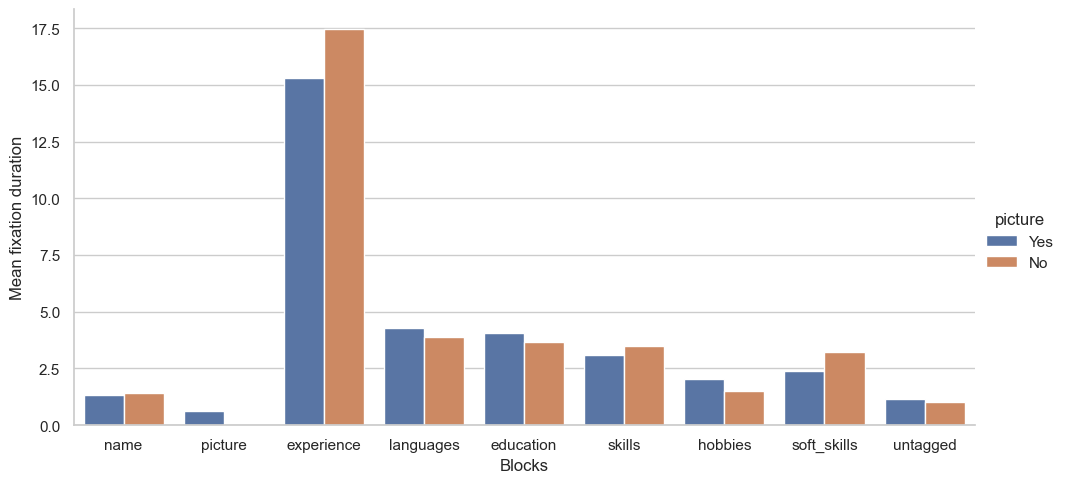

In [20]:
processing_times(times_subjects, "Mean fixation duration")

66
65


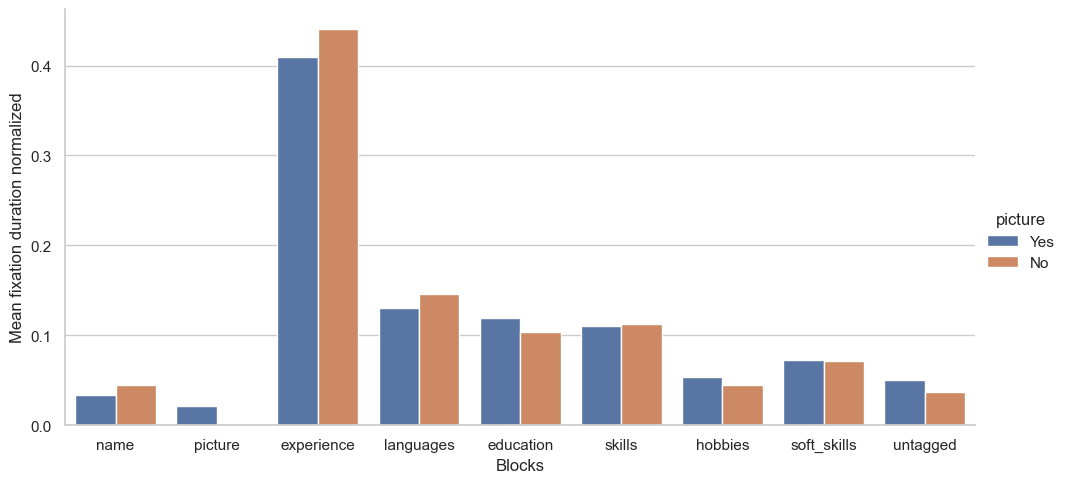

In [21]:
processing_times(times_subjects_norm, "Mean fixation duration normalized")

In [22]:
times_subjects

[{'QUALIFIED_PIC_GOODSORT_EMILIA.PNG': {'name': 0,
   'picture': 0.26856,
   'experience': 4.29688,
   'languages': 0.2002,
   'education': 0.22852,
   'skills': 0,
   'hobbies': 0,
   'soft_skills': 0,
   'untagged': 3.17282,
   'total_time_on_resume': 8.166979999999999},
  'QUALIFIED_NOPIC_BADSORT_VIKTOR.PNG': {'name': 1.6211,
   'picture': 0,
   'experience': 15.363300000000004,
   'languages': 3.750000000000001,
   'education': 3.0127,
   'skills': 3.1074400000000004,
   'hobbies': 0.26758,
   'soft_skills': 2.0625,
   'untagged': 1.17774,
   'total_time_on_resume': 30.362359999999995},
  'UNQUALIFIED_PIC_GOODSORT_KARE.PNG': {'name': 0,
   'picture': 0,
   'experience': 0,
   'languages': 5.784179999999999,
   'education': 0,
   'skills': 2.4511800000000004,
   'hobbies': 0,
   'soft_skills': 0,
   'untagged': 1.8603200000000002,
   'total_time_on_resume': 10.095679999999996},
  'UNQUALIFIED_PIC_GOODSORT_HANS.PNG': {'name': 0,
   'picture': 0.34864,
   'experience': 0.30762,
   'la